## Week 2B: Data Visualization Fundamentals

- Section 401
- Sep 13, 2023

## Housekeeping

- HW #1 due on Wednesday 9/20
- HW #2 posted on same day (9/20)
- Lots of good questions on Ed Discussion so far!
  - Email me if you need access: [https://edstem.org/us/courses/42616/discussion/](https://edstem.org/us/courses/42616/discussion/)

**Reminder:** Quick links to course materials and main sites (Ed Discussion, Canvas, Github) can be found in the upper right corner of the top navbar:

[https://musa-550-fall-2023.github.io/](https://musa-550-fall-2023.github.io/)

## Reminder: Office Hours

- Nick: 
- Teresa: Fridays 10:30AM-12:00PM
- Remote: sign-up for time slots on **Canvas calendar**

## Week #2 Recap

- **Week #2 repository:** [https://github.com/MUSA-550-Fall-2023/week-2](https://github.com/MUSA-550-Fall-2023/week-2)
- Recommended readings for the week listed here

### Last time
- A brief overview of data visualization
- Practical tips on color in data vizualization
        
### Today
- The Python landscape:
    - [matplotlib](https://matplotlib.org/)
    - [pandas](https://pandas.pydata.org/docs/)
- One more static plotting function: [seaborn](https://seaborn.pydata.org/)
- Adding interaction to our plots!
- Intro to the [Altair](https://altair-viz.github.io/) package
- Lab: Reproducing a famous Wall Street Journal data visualization with Altair
    

## Reminder: following along with lectures


### Easiest option: Binder

![](imgs/week2B-binder.png)

### Harder option: downloading Github repository contents

![](imgs/week2-download.png)

## Recommended readings

Be sure to check out the recommended readings for the week:

- [Guide to getting started with matplotlib](https://pbpython.com/effective-matplotlib.html)
- [Plotting & visualization chapter of Python for Data Analysis](https://wesmckinney.com/book/plotting-and-visualization)
    - A good introduction to plotting with matplotlib, pandas, and seaborn
- Altair:
  - [Introduction to Statistical Visualization](https://altair-viz.github.io/getting_started/starting.html)
  - [Interactive charts with altair](https://altair-viz.github.io/user_guide/interactions.html)
  - [Exploring Seattle Weather: A Case Study](https://altair-viz.github.io/case_studies/exploring-weather.html)
- Data viz design: [Introductory slides of London's design guidelines](https://data.london.gov.uk/blog/city-intelligence-data-design-guidelines/)


In [1]:
# The imports
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Make sure plots show up in JupyterLab!
%matplotlib inline

## The Python data viz landscape

So many tools...so little time

<center>
    <img src="imgs/python-dataviz-landscape.png" width=800></img>
</center>

## Which one is the best?

## There isn't one...

You'll use different packages to achieve different goals, and they each have different things they are good at.

Today, we'll focus on: 
- **matplotlib:** the classic
- **pandas:** built on matplotlib, quick plotting built in to DataFrames
- **seaborn:** built on matplotlib, adds functionality for fancy statistical plots
- **altair:** interactive, relying on javascript plotting library Vega

And next week for geospatial data:
- holoviews/geoviews
- matplotlib/cartopy
- geopandas/geopy

**Goal:** introduce you to the most common tools and enable you to know the best package for the job in the future

## The classic: matplotlib

- Very well tested, robust plotting library 
- Can reproduce just about any plot (sometimes with a lot of effort)

![](imgs/matplotlib-commits.png)

### With some downsides...

- Imperative, overly verbose syntax
- Little support for interactive/web graphics

### Available functionality

- Don't need to memorize syntax for all of the plotting functions
- Example gallery: [https://matplotlib.org/stable/gallery/index.html](https://matplotlib.org/stable/gallery/index.html)
- See the cheat sheet available in this repository

### Most commonly used: 

- Simple line plots: [plot()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html)
- Multiple axes per figure: [subplot()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html)
- 2D image (RGB) data : [imshow()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html)
- 2D arrays: [pcolormesh()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pcolormesh.html)
- Histograms: [hist()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)
- Bar charts: [bar()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html)
- Pie charts: [pie()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html)
- Scatter plots: [scatter()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html)

### Working with matplotlib

We'll use the *object-oriented* interface to matplotlib
- Create `Figure` and `Axes` objects
- Add plots to the `Axes` object
- Customize any and all aspects of the `Figure` or `Axes` objects


- **Pro**: Matplotlib is extraordinarily general — you can do pretty much *anything* with it
- **Con**: There's a steep learning curve, with a lot of matplotlib-specific terms to learn

### Learning the matplotlib language

<img width="600" src="https://pbpython.com/images/matplotlib-anatomy.png"></img>

[Source](https://matplotlib.org/faq/usage_faq.html)

### Recommended reading

- [Introduction to the object-oriented interface](https://pbpython.com/effective-matplotlib.html)
- A good walk through on using matplotlib to customize plots
- Listed in the README for this week's repository too

<img width="700" src="https://pbpython.com/images/matplotlib-pbpython-example.png"></img>

## Let's load some data to plot...

We'll use the [Palmer penguins](https://github.com/allisonhorst/palmerpenguins) data set, data collected for three species of penguins at Palmer station in Antartica

<img width=300 src="https://github.com/allisonhorst/palmerpenguins/blob/main/man/figures/palmerpenguins.png?raw=true"></img>

<img src="https://github.com/allisonhorst/palmerpenguins/blob/main/man/figures/lter_penguins.png?raw=true" width=500>

Artwork by [@allison_horst](https://github.com/allisonhorst)

In [2]:
# Load data on Palmer penguins
penguins = pd.read_csv("./data/penguins.csv")

In [3]:
# Show the first ten rows
penguins.head(n=10)    

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,female,2007
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,male,2007
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN,2007
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN,2007


Data is already in *tidy* format

## A simple visualization, 3 different ways

> I want to scatter flipper length vs. bill length, colored by the penguin species

## 1. Using matplotlib 

Plotting Adelie...
Plotting Chinstrap...
Plotting Gentoo...


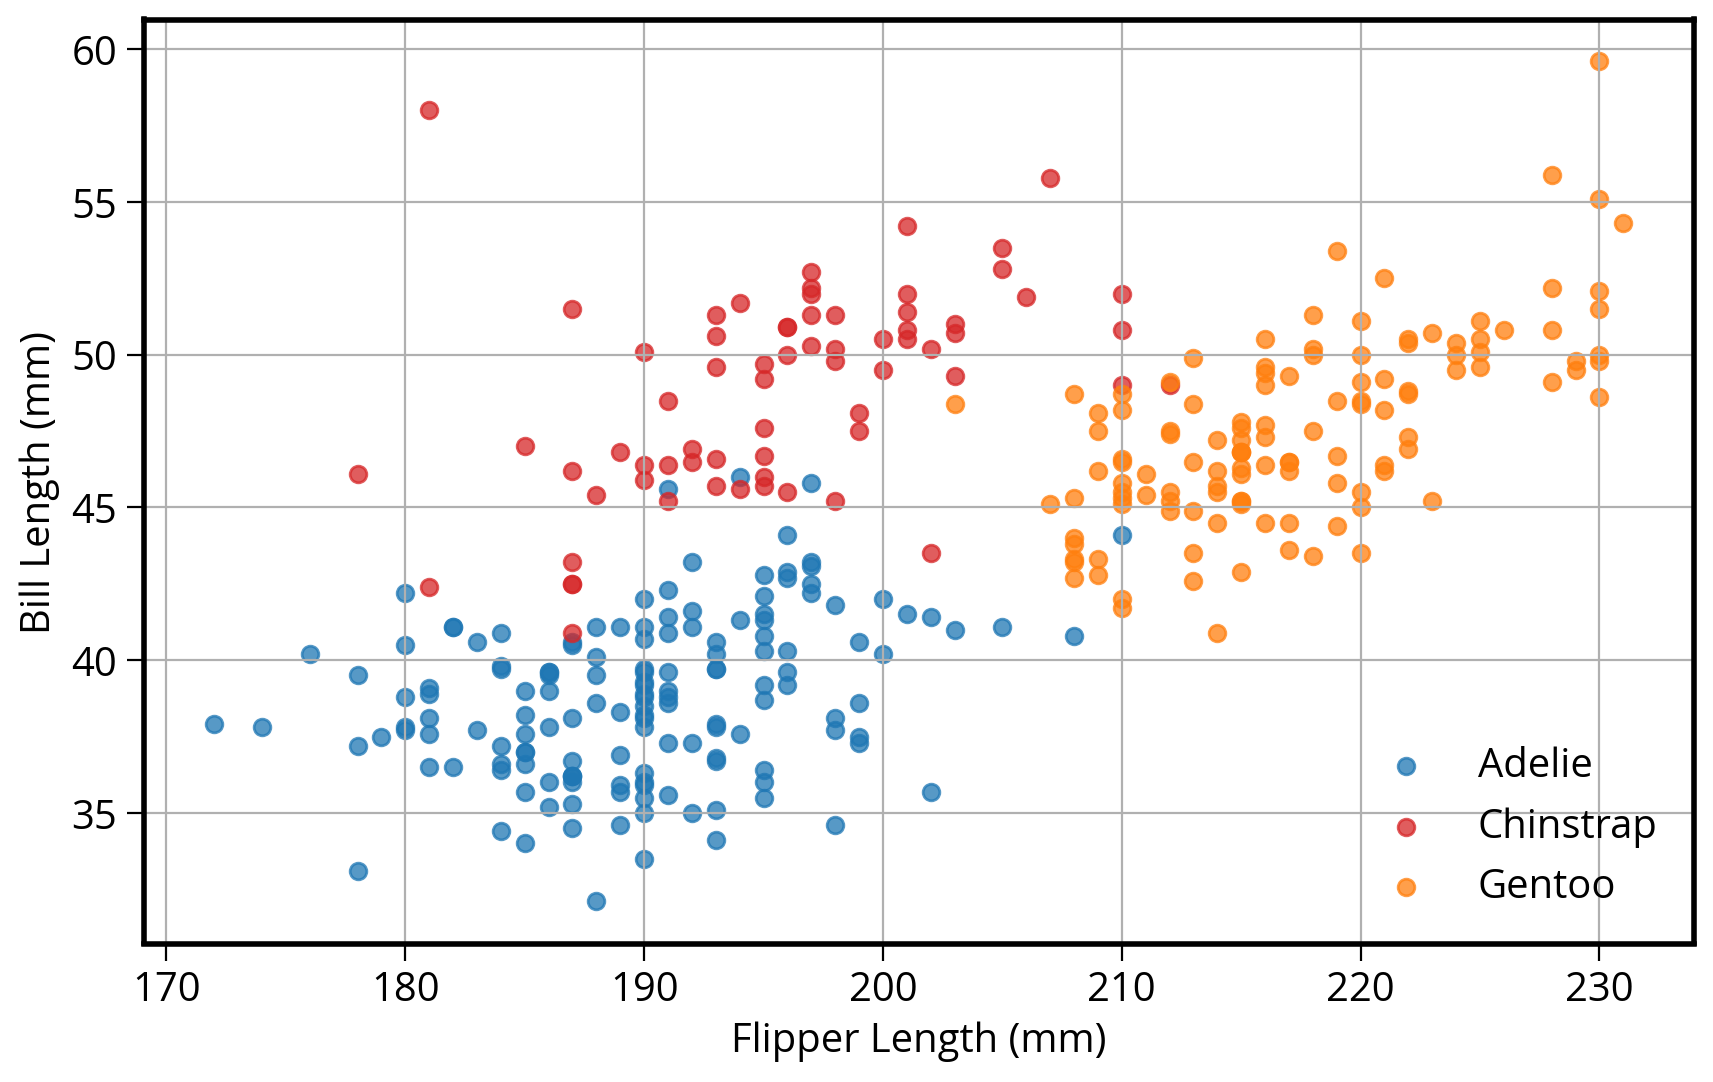

In [4]:
# Setup a dict to hold colors for each species
color_map = {"Adelie": "#1f77b4", "Gentoo": "#ff7f0e", "Chinstrap": "#D62728"}

# Initialize the figure "fig" and axes "ax"
fig, ax = plt.subplots(figsize=(10, 6))

# Group the data frame by species and loop over each group
# NOTE: "group" will be the dataframe holding the data for "species"
for species, group in penguins.groupby("species"):
    print(f"Plotting {species}...")

    # Plot flipper length vs bill length for this group
    # Note: we are adding this plot to the existing "ax" object
    ax.scatter(
        group["flipper_length_mm"],
        group["bill_length_mm"],
        marker="o",
        label=species,
        color=color_map[species],
        alpha=0.75,
    )

# Plotting is done...format the axes!

## Add a legend to the axes
ax.legend(loc="best")

## Add x-axis and y-axis labels
ax.set_xlabel("Flipper Length (mm)")
ax.set_ylabel("Bill Length (mm)")

## Add the grid of lines
ax.grid(True)

## 2. How about in `pandas`?

DataFrames have a built-in "plot" function that can make all of the basic type of matplotlib plots!

In [5]:
# Tab complete on the plot attribute of a dataframe to see the available functions
#penguins.plot.

First, we need to add a new "color" column specifying the color to use for each species type.

Use the [`pd.replace()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html): it use a dict to replace values in a DataFrame column.

In [6]:
# Calculate a list of colors
color_map = {"Adelie": "#1f77b4", "Gentoo": "#ff7f0e", "Chinstrap": "#D62728"}

# Map species name to color 
penguins["color"] = penguins["species"].replace(color_map)

penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,color
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,#1f77b4
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,#1f77b4
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,#1f77b4
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007,#1f77b4
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,#1f77b4


Now plot!

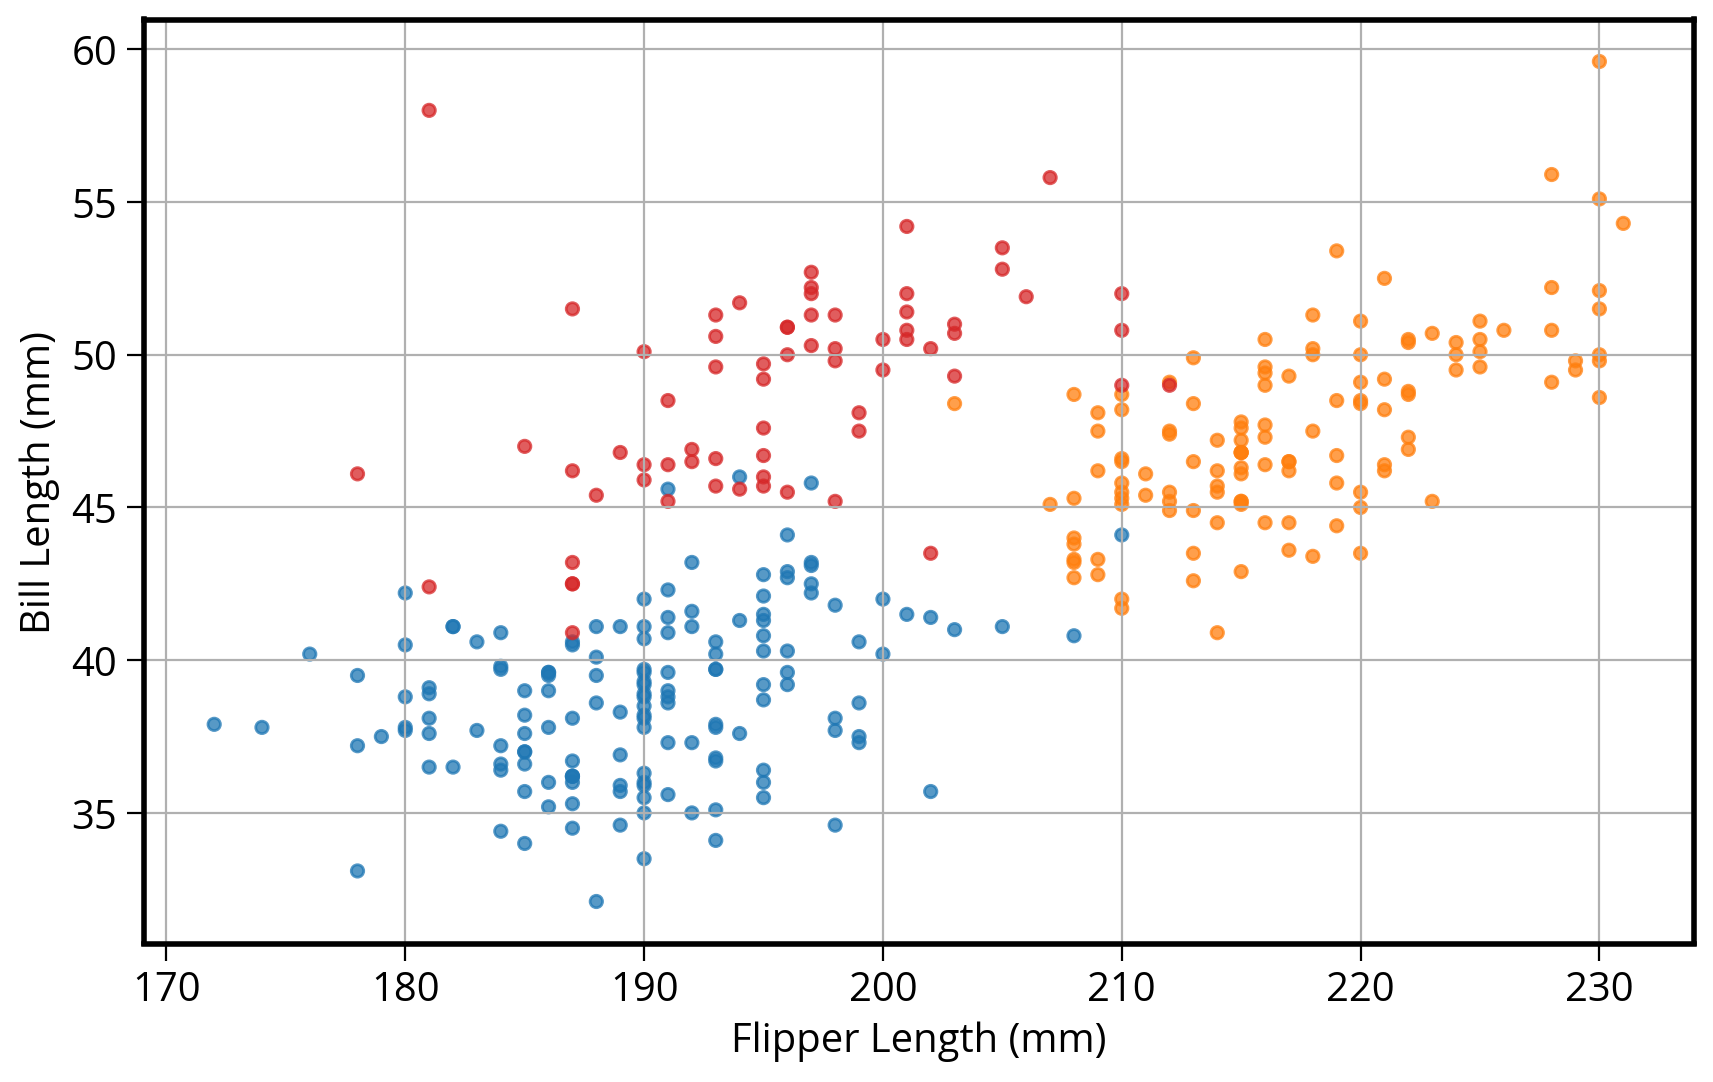

In [7]:
# Same as before: Start by initializing the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Scatter plot two columns, colored by third
# Use the built-in pandas plot.scatter function
penguins.plot.scatter(
    x="flipper_length_mm",
    y="bill_length_mm",
    c="color",
    alpha=0.75,
    ax=ax, # IMPORTANT: Make sure to plot on the axes object we created already!
)

# Format the axes finally
ax.set_xlabel("Flipper Length (mm)")
ax.set_ylabel("Bill Length (mm)")
ax.grid(True)

**Note:** no easy way to get legend added to the plot in this case...

#### Disclaimer

- In my experience, I have found the `pandas` plotting capabilities are good for quick and unpolished plots during the data exploration phase
- Most of the pandas plotting functions serve as shorcuts, removing some biolerplate matplotlib code 
- If I'm trying to make polished, clean data visualization, I'll usually opt to use matplotlib from the beginning

## 3. Seaborn: statistical data visualization

**Seaborn** is designed to plot two columns colored by a third column...

<center>
    <a href="https://seaborn.pydata.org/examples/index.html" target="blank_">
    <img src="imgs/seaborn.png" width=1000></img>
    </a>
</center>

In [8]:
import seaborn as sns

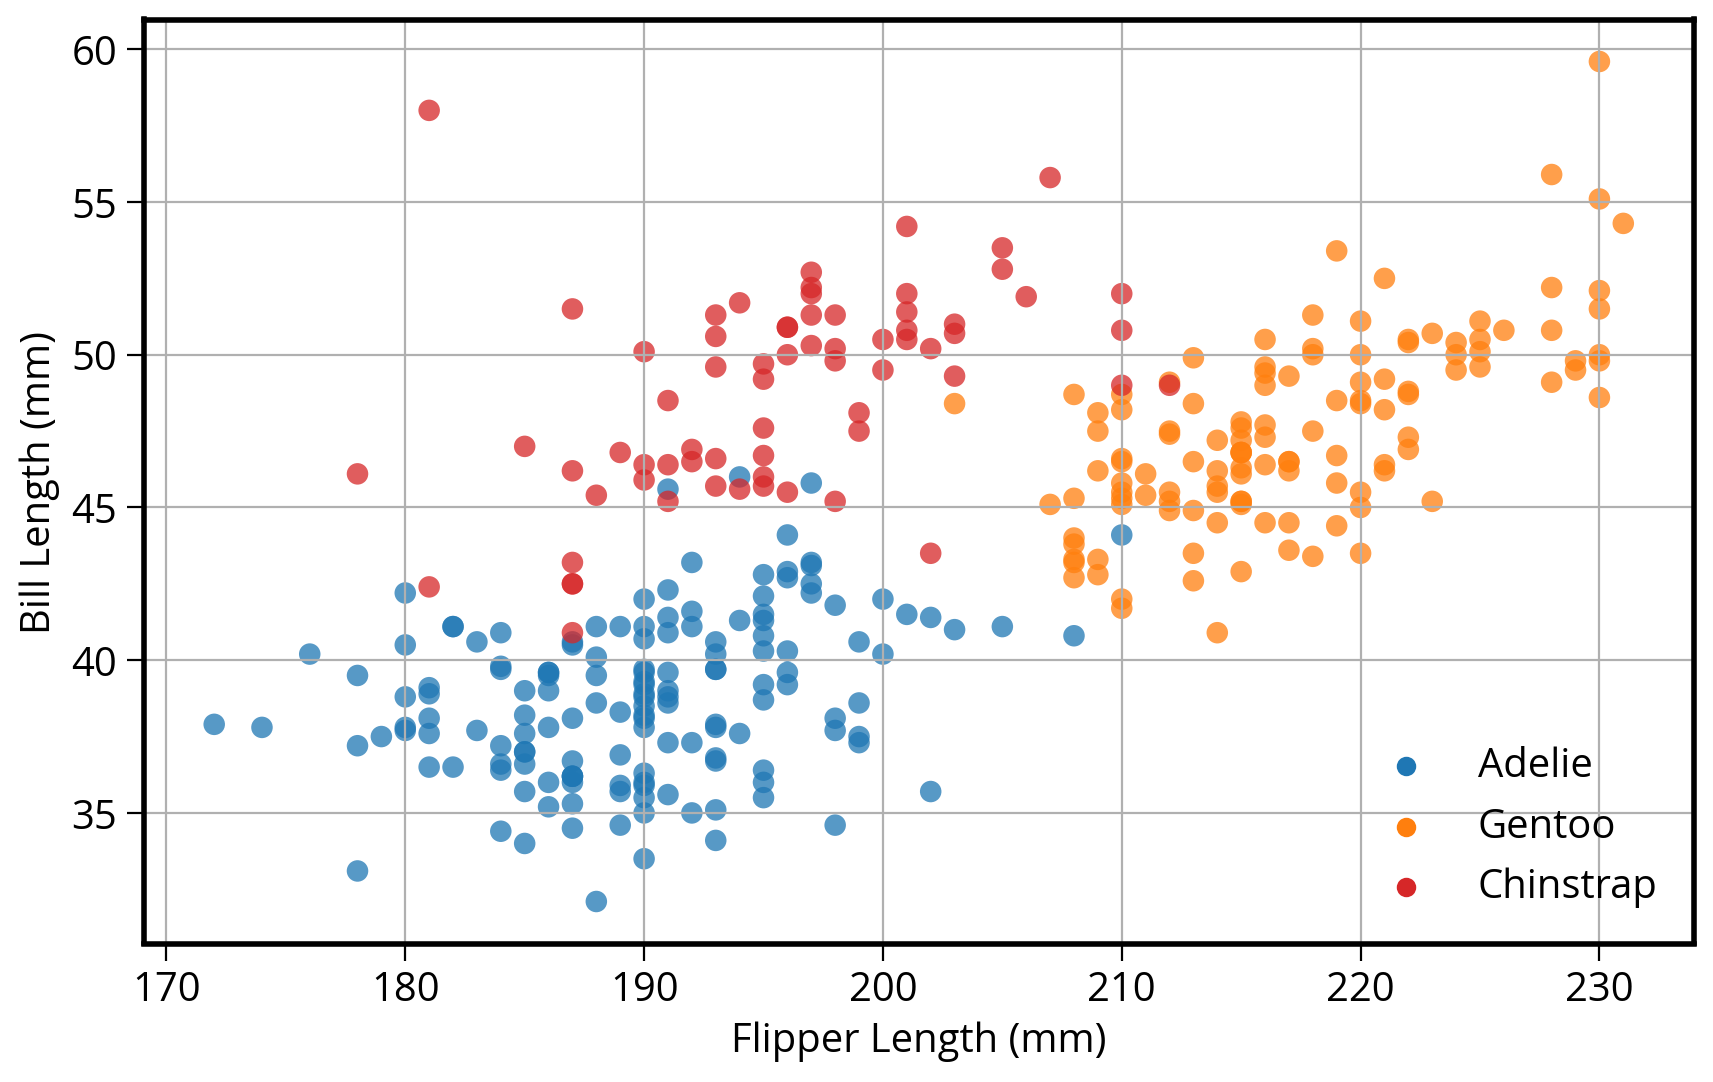

In [9]:
# Initialize the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# style keywords as dict
color_map = {"Adelie": "#1f77b4", "Gentoo": "#ff7f0e", "Chinstrap": "#D62728"}
style = dict(palette=color_map, s=60, edgecolor="none", alpha=0.75)

# use the scatterplot() function
sns.scatterplot(
    x="flipper_length_mm", # the x column
    y="bill_length_mm", # the y column
    hue="species", # the third dimension (color)
    data=penguins, # pass in the data
    ax=ax, # plot on the axes object we made
    **style # add our style keywords
)

# Format with matplotlib commands
ax.set_xlabel("Flipper Length (mm)")
ax.set_ylabel("Bill Length (mm)")
ax.grid(True)
ax.legend(loc='best')

::: {.callout-note title="Side note: the **kwargs syntax"}

The `**` syntax is the *unpacking* operator. It will unpack the dictionary and pass each keyword to the function. 

So the previous code is the same as:

```python
sns.scatterplot(
    x="flipper_length_mm", 
    y="bill_length_mm", 
    hue="species",
    data=penguins, 
    ax=ax, 
    palette=color_map, # defined in the style dict 
    edgecolor="none", # defined in the style dict
    alpha=0.5 # defined in the style dict
)
```

But we can use `**style` as a shortcut!

:::

### An aside: the seaborn objects interface

Seaborn recently introduced an "objects" interface, a completely new syntax that aims to be more declarative. It hides the interaction with matplotlib for the user and provides an more intuitive way to customize charts.

You'll see a lot of similarities between the "objects" interface and the next library we will talk about: *altair*.

::: {.callout-note}

Since it's so new and not yet finalized, we won't recommend using it during this course. However, we wanted to make sure you're aware of it as it could be a good option in the future. More info can be found on [seaborn's documentation](https://seaborn.pydata.org/tutorial/objects_interface).

:::

As a reference, our scatterplot example would look like this in the "objects" interface:

In [10]:
import seaborn.objects as so

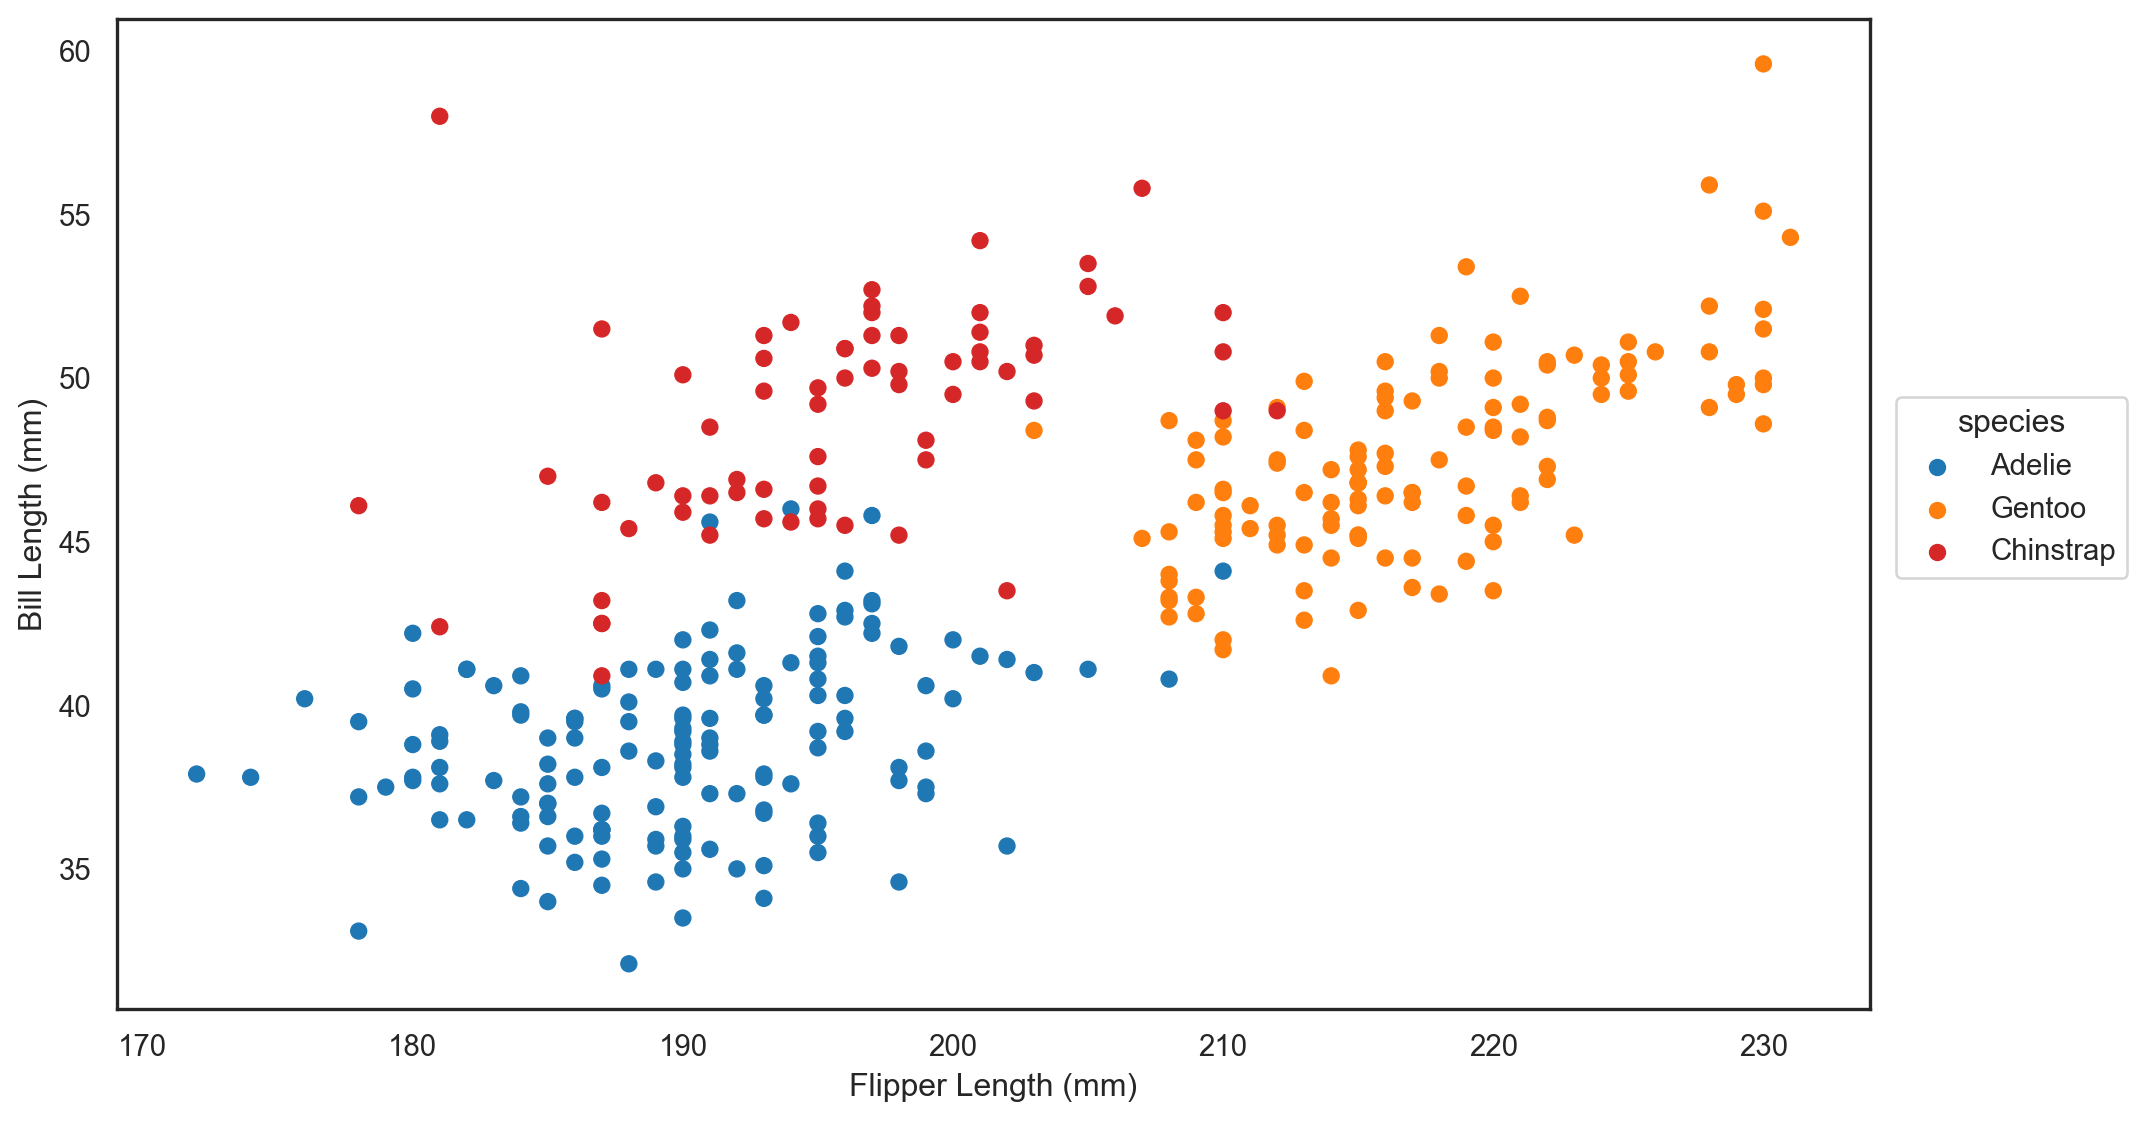

In [11]:
(
    so.Plot(x="flipper_length_mm", y="bill_length_mm", color="species", data=penguins)
    .add(so.Dot())
    .scale(color=color_map)
    .layout(size=(10, 6))
    .label(x="Flipper Length (mm)", y="Bill Length (mm)")
    # Warning: this theme syntax is not yet finalized!
    .theme({"axes.facecolor": "w", "axes.edgecolor": "k"})
)

### Many more functions available

In general, `seaborn` is fantastic for visualizing relationships between variables in a more quantitative way

Don't memorize every function...

I always look at the beautiful [Example Gallery](https://seaborn.pydata.org/examples/index.html) for ideas.

#### How about adding linear regression lines?

Use `lmplot()`

/Users/nhand/mambaforge/envs/musa-550-fall-2023/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


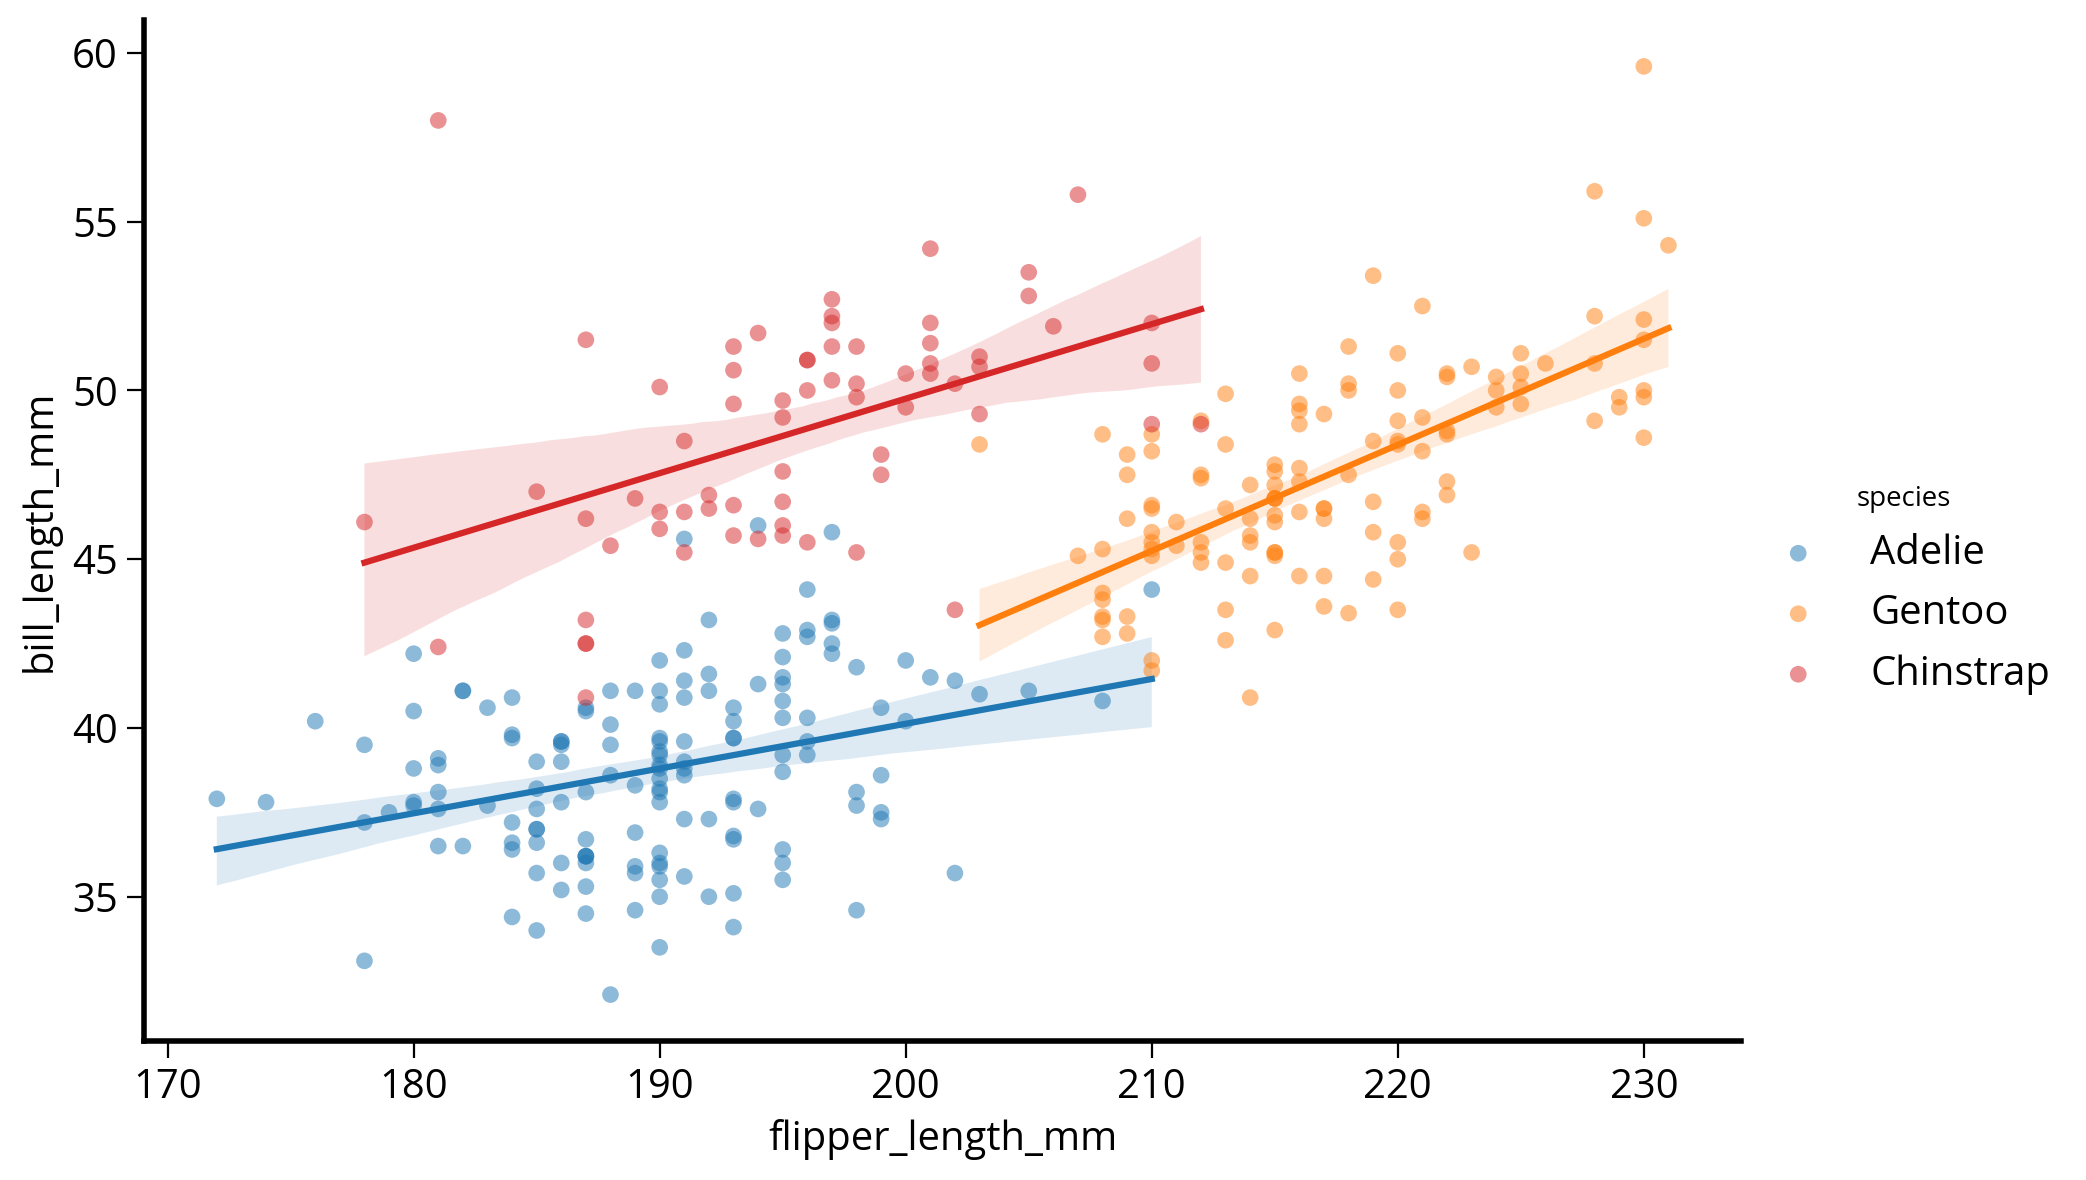

In [12]:
sns.lmplot(
    x="flipper_length_mm",
    y="bill_length_mm",
    hue="species",
    data=penguins,
    height=6,
    aspect=1.5,
    palette=color_map,
    scatter_kws=dict(edgecolor="none", alpha=0.5),
);

#### How about the smoothed 2D distribution?

Use [`jointplot()`](https://seaborn.pydata.org/generated/seaborn.jointplot.html)

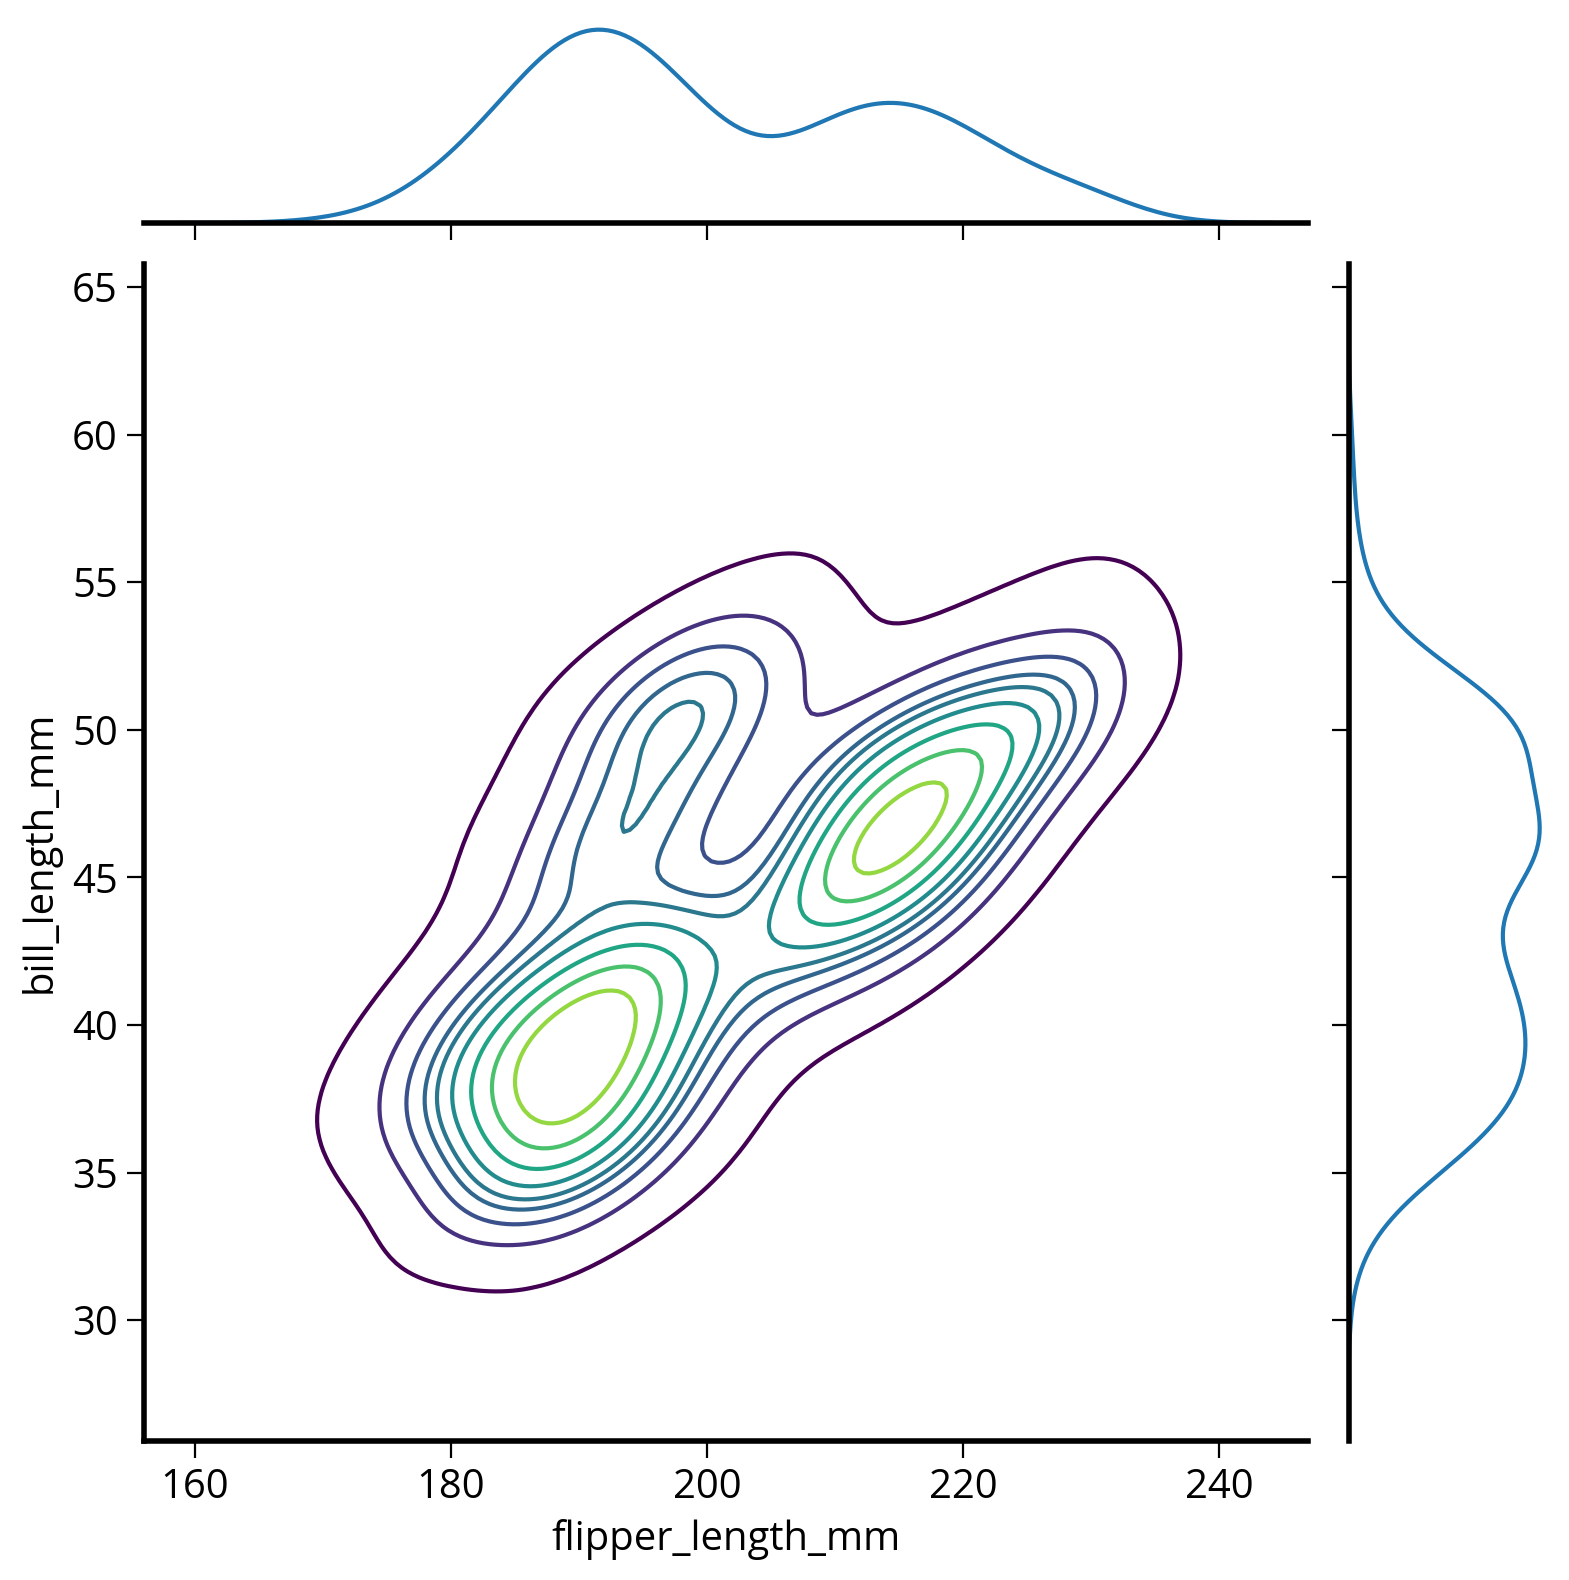

In [13]:
sns.jointplot(
    x="flipper_length_mm",
    y="bill_length_mm",
    data=penguins,
    height=8,
    kind="kde",
    cmap="viridis",
);

#### How about comparing more than two variables at once?

Use [`pairplot()`](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

/Users/nhand/mambaforge/envs/musa-550-fall-2023/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


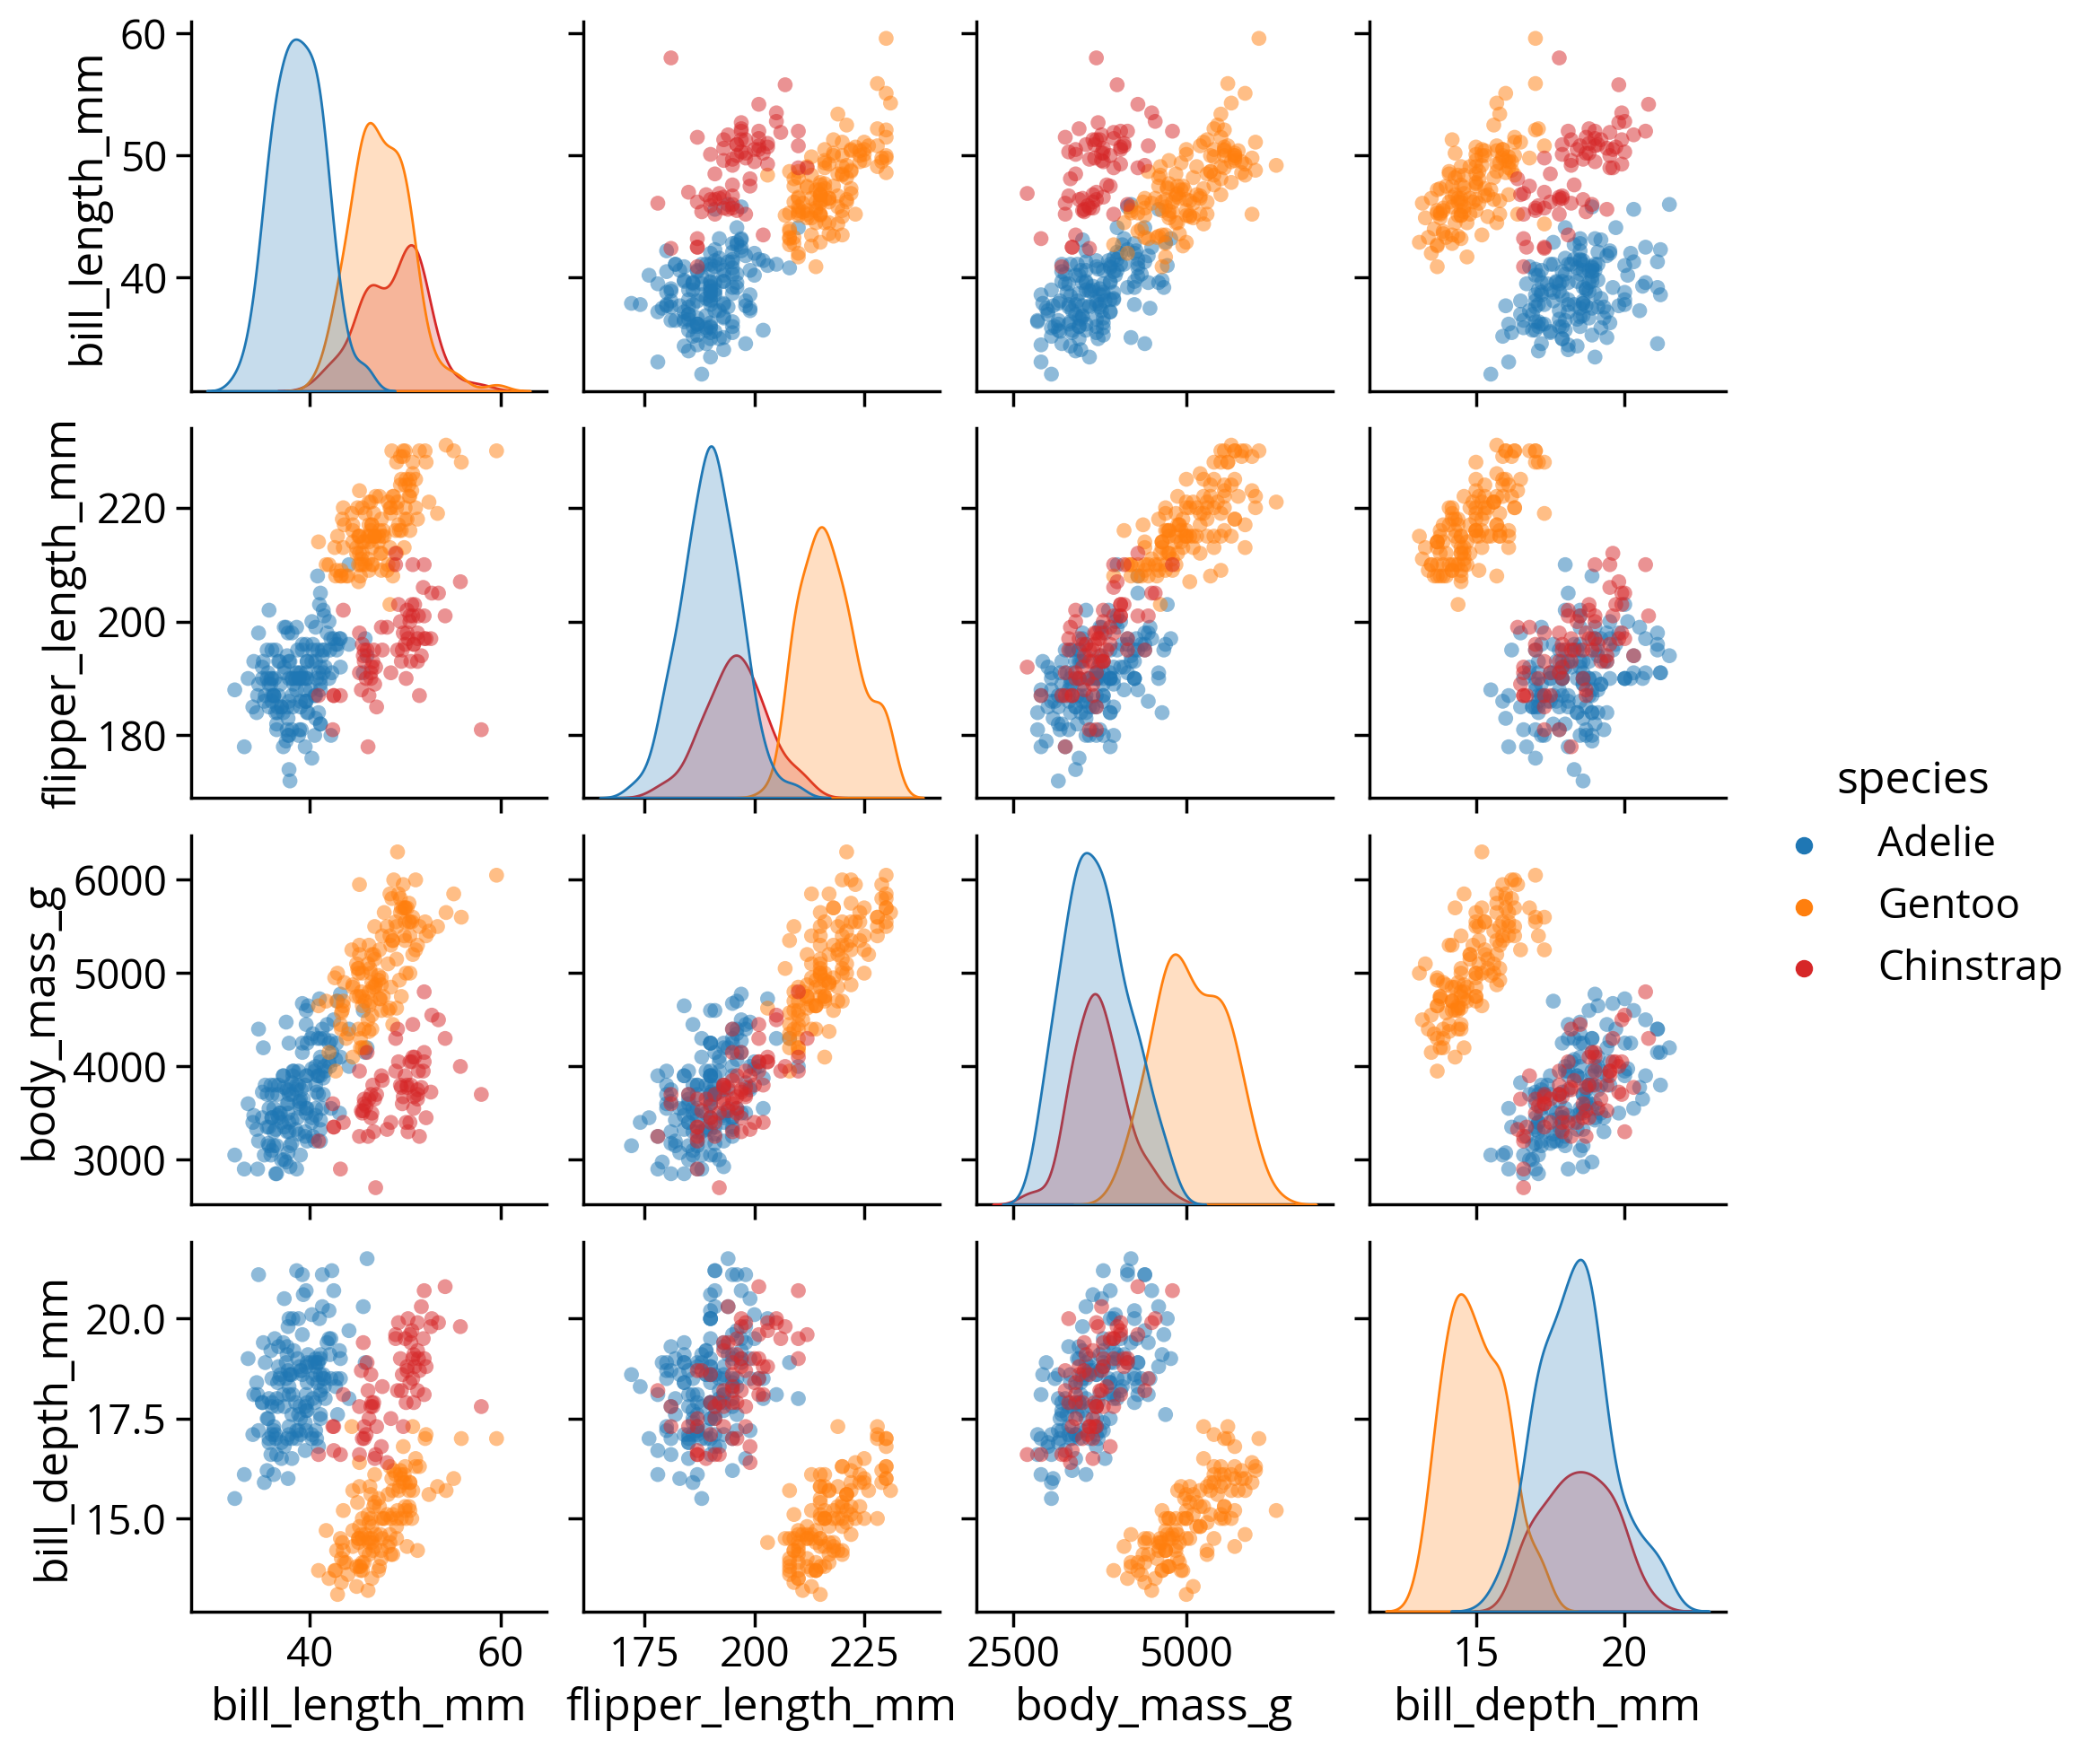

In [14]:
# The variables to plot
variables = [
    "species",
    "bill_length_mm",
    "flipper_length_mm",
    "body_mass_g",
    "bill_depth_mm",
]

# Set the seaborn style
sns.set_context("notebook", font_scale=1.5)

# make the pair plot
sns.pairplot(
    penguins[variables].dropna(),
    palette=color_map,
    hue="species",
    plot_kws=dict(alpha=0.5, edgecolor="none"),
)

#### Let's explore the bill length differences across species and gender

We can use seaborn's functionality for exploring categorical data sets: [`catplot()`](https://seaborn.pydata.org/generated/seaborn.catplot.html) 

/Users/nhand/mambaforge/envs/musa-550-fall-2023/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


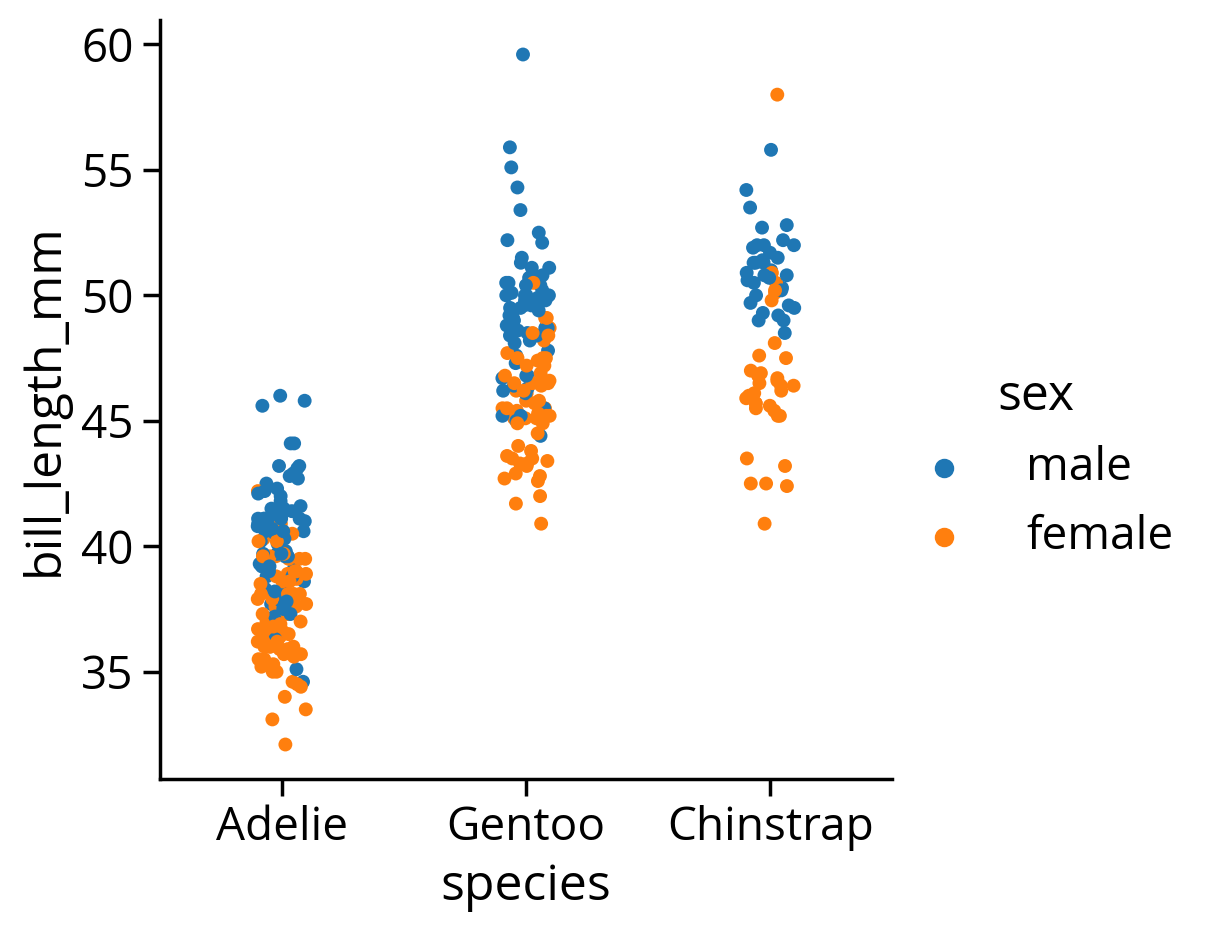

In [15]:
sns.catplot(x="species", y="bill_length_mm", hue="sex", data=penguins);

### Seaborn tutorials broken down by data type


- [Tutorial landing page](https://seaborn.pydata.org/tutorial.html)
    - [Visualizing statistical relationships](https://seaborn.pydata.org/tutorial/relational.html)
    - [Categorical data](https://seaborn.pydata.org/tutorial/categorical.html)
    - [Visualizing the distribution of a data set](https://seaborn.pydata.org/tutorial/distributions.html)
    - [Visualizing linear relationships](https://seaborn.pydata.org/tutorial/regression.html)

### Color palettes in seaborn

Great tutorial available in the [seaborn documentation](https://seaborn.pydata.org/tutorial/color_palettes.html)

::: {.callout-tip}

The `color_palette()` function in seaborn is **very useful**. For me, it is the easiest way to get a list of hex strings for a specific color map.

:::

In [16]:
# This is a list of hex strings values for the colors
viridis = sns.color_palette("viridis", n_colors=7).as_hex()

# Print it out to see the list
print(viridis)

['#472d7b', '#3b528b', '#2c728e', '#21918c', '#28ae80', '#5ec962', '#addc30']


Can we preview the colors in JupyterLab?

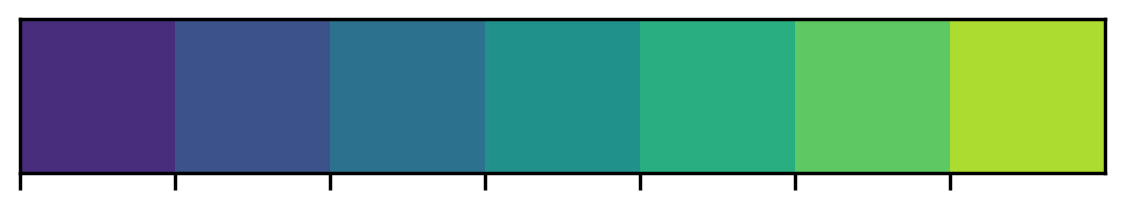

In [17]:
# Option 1: Use the sns.palplot() function to make a matplotlib figure
sns.palplot(viridis)

In [18]:
# Option 2: If you output it from a cell, JupyterLab automatically renders it
viridis

['#472d7b', '#3b528b', '#2c728e', '#21918c', '#28ae80', '#5ec962', '#addc30']

You can also create custom light, dark, or diverging color maps, based on the desired hues at either end of the color map.

In [19]:
sns.diverging_palette(10, 220, sep=50, n=7)

[(0.8545371341681446, 0.22957019267094914, 0.2762321841840895),
 (0.893874673817505, 0.5227939598171077, 0.550291758794949),
 (0.9343361431711328, 0.8243955488817281, 0.8321816069661188),
 (0.95, 0.95, 0.95),
 (0.8219571616100565, 0.8717857815974047, 0.8883729671828065),
 (0.5305085648961756, 0.6828624970921686, 0.7302705698303427),
 (0.24715576253545807, 0.49918708160096675, 0.5765599057376697)]

## 4. Altair: Declarative Data Viz in Python

<center>
    <img src="imgs/altair-banner.png" width=1000></img>
</center>


Documentation available at: [https://altair-viz.github.io/](https://altair-viz.github.io/)

### The altair import statement

In [20]:
import altair as alt  

### A visualization grammar

- Specify *what* should be done
- Details determined automatically
- Charts are really just *visualization specifications* and the *data* to make the plot
- Relies on [vega](https://vega.github.io/vega/) and [vega-lite](https://vega.github.io/vega-lite/)

**Important:** focuses on *tidy* data — you'll often find yourself running `pd.melt()` to get to tidy format

Let's try out our flipper length vs bill length example:

In [21]:
# Step 1: Initialize the chart with the data
chart = alt.Chart(penguins)

# Step 2: Define what kind of marks to use
chart = chart.mark_circle(size=60)

# Step 3: Encode the visual channels
chart = chart.encode(
    x="flipper_length_mm",
    y="bill_length_mm",
    color="species", 
    tooltip=["species", "flipper_length_mm", "bill_length_mm", "island", "sex"],
)

# Optional: Make the chart interactive
chart.interactive()

alt.Chart(...)

### Altair shorcuts

- There are built-in objects to represent "x", "y", "color", "tooltip", etc..
- Using the object syntax allows your to customize how different elements behave

**Example:** previous code is the same as

```python
chart = chart.encode(
    x=alt.X("flipper_length_mm"),
    y=alt.Y("bill_length_mm"),
    color=alt.Color("species"),
    tooltip=alt.Tooltip(["species", "flipper_length_mm", "bill_length_mm", "island", "sex"]),
)
```

### Changing Altair chart axis limits

- By default, Altair assumes the axis will start at 0
- To center on the data automatically, we need to use a `alt.Scale()` object to specify the scale

In [22]:
# initialize the chart with the data
chart = alt.Chart(penguins)

# define what kind of marks to use
chart = chart.mark_circle(size=60)

# encode the visual channels
chart = chart.encode(
    x=alt.X("flipper_length_mm", scale=alt.Scale(zero=False)), # This part is new!
    y=alt.Y("bill_length_mm", scale=alt.Scale(zero=False)), # This part is new!
    color="species",
    tooltip=["species", "flipper_length_mm", "bill_length_mm", "island", "sex"],
)

# make the chart interactive
chart = chart.interactive()

chart

alt.Chart(...)

### Encodings

* X: x-axis value
* Y: y-axis value
* Color: color of the mark
* Opacity: transparency/opacity of the mark
* Shape: shape of the mark
* Size: size of the mark
* Row: row within a grid of facet plots
* Column: column within a grid of facet plots

For a complete list of these encodings, see the [Encodings](https://altair-viz.github.io/user_guide/encoding.html) section of the documentation.

Altair charts can be fully specified as JSON $\rightarrow$ easy to embed in HTML on websites!

In [23]:
# Save the chart as a JSON string!
json = chart.to_json()

In [24]:
# Print out the first 1,000 characters
print(json[:1000])

{
  "$schema": "https://vega.github.io/schema/vega-lite/v5.14.1.json",
  "config": {
    "view": {
      "continuousHeight": 300,
      "continuousWidth": 300
    }
  },
  "data": {
    "name": "data-6e6be28484bfcb7bdf9764c3163fc5aa"
  },
  "datasets": {
    "data-6e6be28484bfcb7bdf9764c3163fc5aa": [
      {
        "bill_depth_mm": 18.7,
        "bill_length_mm": 39.1,
        "body_mass_g": 3750.0,
        "color": "#1f77b4",
        "flipper_length_mm": 181.0,
        "island": "Torgersen",
        "sex": "male",
        "species": "Adelie",
        "year": 2007
      },
      {
        "bill_depth_mm": 17.4,
        "bill_length_mm": 39.5,
        "body_mass_g": 3800.0,
        "color": "#1f77b4",
        "flipper_length_mm": 186.0,
        "island": "Torgersen",
        "sex": "female",
        "species": "Adelie",
        "year": 2007
      },
      {
        "bill_depth_mm": 18.0,
        "bill_length_mm": 40.3,
        "body_mass_g": 3250.0,
        "color": "#1f77b4",
        

### Publishing the visualization online

In [25]:
chart.save("chart.html")

In [26]:
# Display IFrame in IPython
from IPython.display import IFrame
IFrame('chart.html', width=600, height=375)

### Watch out for large datasets!

Note that the data is embedded *inside* the JSON representation of the chart. That means that if you pass a DataFrame to your chart with a lot of data, your browser might be overwhelmed and everything might freeze. To avoid this, altair will throw an error if your DataFrame has more than 5,000 rows. 

There are a number of strategies outlined on [the docs](https://altair-viz.github.io/user_guide/large_datasets.html) for dealing with larger datasets. One is to simply disable the max rows check — this could be a good idea if your dataset is just a bit larger than the limit. 

```python
alt.data_transformers.disable_max_rows()
```

Another strategy is to use the more flexible "vegafusion" library, which has improved implementations of data transformations and allows charts with data up to 100,000 rows. You can enable this transformer with:

```python
alt.data_transformers.enable("vegafusion")
```


::: {.callout-note}
If you get an error about missing packages, make sure you update your course environment to the latest version. See the instructions [here](https://musa-550-fall-2023.github.io/resource/mamba.html#updating-an-existing-environment).
:::

### Usually, the function calls are *chained* together

Surround your code with parentheses, and put each line of code on a new line

In [27]:
chart = (
    alt.Chart(penguins)
    .mark_circle(size=60)
    .encode(
        x=alt.X("flipper_length_mm", scale=alt.Scale(zero=False)),
        y=alt.Y("bill_length_mm", scale=alt.Scale(zero=False)),
        color="species:N",
    )
    .interactive()
)

chart

alt.Chart(...)

Note that the `interactive()` call allows users to pan and zoom.

Altair is able to automatically determine the type of the variable using built-in heuristics. Altair and Vega-Lite support four primitive data types:

<table style="font-size: 20px">
  <tr>
    <th>Data Type</th>
    <th>Code</th>
    <th>Description</th>
  </tr>
  <tr>
    <td>quantitative</td>
    <td>Q</td>
    <td>Numerical quantity (real-valued)</td>
  </tr>
  <tr>
    <td>nominal</td>
    <td>N</td>
    <td>Name / Unordered categorical</td>
  </tr>
  <tr>
    <td>ordinal</td>
    <td>O</td>
    <td>Ordered categorial</td>
  </tr>
  <tr>
    <td>temporal</td>
    <td>T</td>
    <td>Date/time</td>
  </tr>
</table>

You can set the data type of a column explicitly using a one letter code attached to the column name with a colon:

### Faceting

Easily create multiple views of a dataset with *faceting*

In [28]:
(
    alt.Chart(penguins)
    .mark_point()
    .encode(
        x=alt.X("flipper_length_mm:Q", scale=alt.Scale(zero=False)),
        y=alt.Y("bill_length_mm:Q", scale=alt.Scale(zero=False)),
        color="species:N",
    )
    .properties(width=200, height=200)
    .facet(column="species")
    .interactive()
)

alt.FacetChart(...)

Note: I've added the variable type identifiers (Q, N) to the previous example

Lots of features to create *compound charts*: repeated charts, faceted charts, vertical and horizontal stacking of subplots.

See the [documentation](https://altair-viz.github.io/user_guide/compound_charts.html) for examples

### A grammar of interaction

A relatively new addition to altair, vega, and vega-lite. This allows you to define what happens when users interact with your visualization.


::: {.callout-tip}
I highly recommend reading through the documentation section on [interactive charts](https://altair-viz.github.io/user_guide/interactions.html). Altair's interaction language is very complex and you can do a lot, including
adding widgets (e.g., sliders) and multiple kinds of selection windows.
:::

### A faceted plot, now with interaction!

In [29]:
# Create the selection box
brush = alt.selection_interval()


(
    alt.Chart(penguins)  # Create the chart
    .mark_point()  # Use point markers
    .encode(  # Encode
        x=alt.X("flipper_length_mm", scale=alt.Scale(zero=False)),  # X
        y=alt.Y("bill_length_mm", scale=alt.Scale(zero=False)),  # Y
        # Use a conditional color based on brush
        color=alt.condition(brush, "species", alt.value("lightgray")),  # Color
        tooltip=["species", "flipper_length_mm", "bill_length_mm"],  # Tooltip
    )
    .add_params(brush)  # Add brush parameter
    .properties(width=200, height=200)  # Set width/height
    .facet(column="species") # Facet
)

alt.FacetChart(...)

### More on conditions

We used the `alt.condition()` function to specify a conditional color for the markers. It takes three arguments:

- The `brush` object determines if a data point is currently selected
- If inside the `brush`, color the marker according to the "species" column
- If outside the `brush`, use the literal hex color "lightgray" 

### Selecting across multiple variables

Let's examine the relationship between `flipper_length_mm`, `bill_length_mm`, and `body_mass_g`

We'll use [a repeated chart](https://altair-viz.github.io/user_guide/compound_charts.html#repeat-chart) that repeats variables across rows and columns.

Use a conditional color again, based on a brush selection.

In [30]:
# Setup the selection brush
brush = alt.selection(type="interval", resolve="global")

# Setup the chart
(
    alt.Chart(penguins)
    .mark_circle()
    .encode(
        x=alt.X(alt.repeat("column"), type="quantitative", scale=alt.Scale(zero=False)),
        y=alt.Y(alt.repeat("row"), type="quantitative", scale=alt.Scale(zero=False)),
        color=alt.condition(
            brush, "species:N", alt.value("lightgray")
        ),  # conditional color
    )
    .properties(
        width=200,
        height=200,
    )
    .add_params(brush)
    .repeat(  # repeat variables across rows and columns
        row=["flipper_length_mm", "bill_length_mm", "body_mass_g"],
        column=["body_mass_g", "bill_length_mm", "flipper_length_mm"],
    )
)

/Users/nhand/mambaforge/envs/musa-550-fall-2023/lib/python3.10/site-packages/altair/utils/deprecation.py:65: AltairDeprecationWarning: 'selection' is deprecated.
   Use 'selection_point()' or 'selection_interval()' instead; these functions also include more helpful docstrings.
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)


alt.RepeatChart(...)

### More exploratory visualization

Let's try out some more features of Altair...these examples are meant as reference for you to showcase some common features.

::: {.callout-note title="Reminder"}

The [Example Gallery](https://altair-viz.github.io/gallery/index.html) is a great place to learn the full functionality of Altair and includes a lot of great examples!
:::

#### Example 1: Color schemes
> Scatter flipper length vs body mass for each species, colored by sex

In [31]:
(
    alt.Chart(penguins)
    .mark_point()
    .encode(
        x=alt.X("flipper_length_mm", scale=alt.Scale(zero=False)),
        y=alt.Y("body_mass_g", scale=alt.Scale(zero=False)),
        color=alt.Color("sex:N", scale=alt.Scale(scheme="set2")),
    )
    .properties(width=400, height=150)
    .facet(row="species")
)

alt.FacetChart(...)

::: {.callout-note}

I've specified the `scale` keyword to the `alt.Color()` object and passed a `scheme` value:

```python
scale=alt.Scale(scheme="set2")
```  

\
The scheme "set2" is a Color Brewer color. The available color schemes are very similar to those matplotlib. A list is available on the Vega documentation: [https://vega.github.io/vega/docs/schemes/](https://vega.github.io/vega/docs/schemes/).

:::

#### Example 2: Histogram aggregations with count
> Next, plot the total number of penguins per species by the island they are found on. 



In [32]:
(
    alt.Chart(penguins)
    .mark_bar()
    .encode(
        # X should show the (normalized) count of each group
        x=alt.X("*:Q", aggregate="count", stack="normalize"), # The * is a placeholder here
        y="island:N",
        color="species:N",
        tooltip=["island", "species", "count(*):Q"],
    )
)

alt.Chart(...)

::: {.callout-note}
I like to think of altair aggregations in terms of the pandas groupby syntax. Under the hood, altair is going to group our data by the other encodings we specified, "island" and "species". The dimension ("X") that gets specified as the `count` aggregation is then the size of each of those groups.
:::

#### Example 3: The count() shorthand

> Plot a histogram of number of penguins by flipper length, grouped by species.

In [33]:
(
    alt.Chart(penguins)
    .mark_bar()
    .encode(
        x=alt.X("flipper_length_mm", bin=alt.Bin(maxbins=20)),
        y="count():Q",  # Shorthand
        color="species",
        tooltip=["species", alt.Tooltip("count()", title="Number of Penguins")],
    )
    .properties(height=250)
)

alt.Chart(...)

#### Example 4: Binning data and using the mean aggregation
> Finally, let's bin the data by body mass and plot the average flipper length per bin, colored by the species. 



In this example, we use a "binning" transformation to bin the data along a certain encoding ("X" in this case), and then we will take the mean along the "Y" encoding. 

In [34]:
(
    alt.Chart(penguins.dropna())
    .mark_line()
    .encode(
        x=alt.X("body_mass_g:Q", bin=alt.Bin(maxbins=10)), # Bin the data!
        y=alt.Y(
            "mean(flipper_length_mm):Q", scale=alt.Scale(zero=False) # Mean of flipper length
        ),  
        color="species:N",
        tooltip=["mean(flipper_length_mm):Q", "count():Q"],
    )
    .properties(height=300, width=500)
)

alt.Chart(...)

::: {.callout-tip}

In addition to `mean()` and `count()`, you can apply a number of different transformations to the data before plotting, including binning, arbitrary functions, and filters. 

See the [Data Transformations](https://altair-viz.github.io/user_guide/transform/index.html) section of the user guide for more details. 


:::

### Dashboards become easy to make...

In [35]:
# Setup a brush selection
brush = alt.selection(type="interval")

# The top scatterplot: flipper length vs bill length
points = (
    alt.Chart()
    .mark_point()
    .encode(
        x=alt.X("flipper_length_mm:Q", scale=alt.Scale(zero=False)),
        y=alt.Y("bill_length_mm:Q", scale=alt.Scale(zero=False)),
        color=alt.condition(brush, "species:N", alt.value("lightgray")),
    )
    .properties(width=800)
    .add_params(brush)
)

# The bottom bar plot
bars = (
    alt.Chart()
    .mark_bar()
    .encode(
        x="count(species):Q",
        y="species:N",
        color="species:N",
    )
    .transform_filter(
        brush  # the filter transform uses the selection to filter the input data to this chart
    )
    .properties(width=800)
)

# Final chart is a vertical stack
chart = alt.vconcat(points, bars, data=penguins)

# Output the chart
chart

alt.VConcatChart(...)

## Exercise: Visualizing the impact of the measles vaccination

Let's reproduce this famous Wall Street Journal visualization showing measles incidence over time using altair.

[http://graphics.wsj.com/infectious-diseases-and-vaccines/](http://graphics.wsj.com/infectious-diseases-and-vaccines/)

### Step 1: Load the data

In [36]:
# Note we are using a relative path
path = "./data/measles_incidence.csv"

# Skip first two rows and convert "-" to NaN automatically
data = pd.read_csv(path, skiprows=2, na_values="-")

data.head()

,YEAR,WEEK,ALABAMA,ALASKA,ARIZONA,ARKANSAS,CALIFORNIA,COLORADO,CONNECTICUT,DELAWARE,...,SOUTH DAKOTA,TENNESSEE,TEXAS,UTAH,VERMONT,VIRGINIA,WASHINGTON,WEST VIRGINIA,WISCONSIN,WYOMING
0,1928,1,3.67,NaN,1.90,4.11,1.38,8.38,4.50,8.58,...,5.69,22.03,1.18,0.4,0.28,NaN,14.83,3.36,1.54,0.91
1,1928,2,6.25,NaN,6.40,9.91,1.80,6.02,9.00,7.30,...,6.57,16.96,0.63,NaN,0.56,NaN,17.34,4.19,0.96,NaN
2,1928,3,7.95,NaN,4.50,11.15,1.31,2.86,8.81,15.88,...,2.04,24.66,0.62,0.2,1.12,NaN,15.67,4.19,4.79,1.36
3,1928,4,12.58,NaN,1.90,13.75,1.87,13.71,10.40,4.29,...,2.19,18.86,0.37,0.2,6.70,NaN,12.77,4.66,1.64,3.64
4,1928,5,8.03,NaN,0.47,20.79,2.38,5.13,16.80,5.58,...,3.94,20.05,1.57,0.4,6.70,NaN,18.83,7.37,2.91,0.91


**Note:** the data is *weekly* and in *wide* format

### Step 2: Calculate the total incidents in a given year per state

::: {.callout-tip title="Hints"}

- You'll want to take the sum over weeks to get the annual total — you can take advantage of the `groupby()` then `sum()` work flow. 
- It will be helpful if you drop the `WEEK` column — you don't need that in the grouping operation. Take a look at the `df.drop(columns=[]`) function ([docs](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html)).

:::

### Step 3: Transform to tidy format

::: {.callout-tip title="Hints"}
You can use `melt()` to get tidy data. You should have 3 columns: year, state, and total incidence.
:::

### Step 4: Make the plot

::: {.callout-tip title="Hints"}
- Take a look at this [heatmap example](https://altair-viz.github.io/gallery/simple_heatmap.html#gallery-simple--heatmap) for an example of the syntax of Altair's heatmap functionality. 
- You can use the `mark_rect()` function to encode the values as rectangles and then color them according to the average annual measles incidence per state.
- You'll want to take advantage of the custom color map defined below to best match the WSJ's graphic.
:::



In [2]:
# Define a custom colormape using Hex codes & HTML color names
colormap = alt.Scale(
    domain=[0, 100, 200, 300, 1000, 3000],
    range=[
        "#F0F8FF",
        "cornflowerblue",
        "mediumseagreen",
        "#FFEE00",
        "darkorange",
        "firebrick",
    ],
    type="sqrt",
)

### Challenges

- Do you agree with the visualization choices made by the WSJ? 
    - Try experimenting with different color scales to see if you can improve the heatmap
    - See the [names of available color maps in Altair](https://vega.github.io/vega/docs/schemes/)
- Try adding a second chart above the heatmap that shows a line chart of the annual average across all 50 states. 

#### Challenge #1: Exploring other color maps

The categorical color scale choice is properly not the best. It's best to use a perceptually uniform color scale like viridis. See below:

#### Challenge #2: Add the annual average chart on top

## That's it!

- HW #1 due on Wednesday Sept 20 before the end of the day
- Wrapping up altair and geospatial analysis and visualization next week! 